In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(3000/necoc)
generations

30

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

40


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/100".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:1127
number of class2:490

 ****** Running generation 0 ****** 

Population's average fitness: 0.46690 stdev: 0.14740
Best fitness: 0.74644 - size: (2, 13) - species 5 - id 113
Average adjusted fitness: 0.204
Mean genetic distance 2.920, standard deviation 0.534
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 8.107 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54531 stdev: 0.15053
Best fitness: 0.75015 - size: (2, 13) - species 3 - id 267
Average adjusted fitness: 0.287
Mean genetic distance 3.018, standard deviation 0.551
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.993 sec (8.050 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57975 stdev: 0.14003
Best fitness: 0.76685 - size: (3, 16) - species 16 - id 538
Average adjusted fitness: 0.274
Mean genetic distance 3.038, standard deviation 0.506
Population of 200 members in 25 species

Population's average fitness: 0.67151 stdev: 0.14064
Best fitness: 0.87879 - size: (6, 20) - species 20 - id 3440
Average adjusted fitness: 0.375
Mean genetic distance 3.292, standard deviation 0.489
Population of 190 members in 31 species
Total extinctions: 0
Generation time: 10.684 sec (10.668 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67812 stdev: 0.12584
Best fitness: 0.87879 - size: (6, 20) - species 20 - id 3440
Average adjusted fitness: 0.379
Mean genetic distance 3.296, standard deviation 0.500
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 10.801 sec (10.777 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67009 stdev: 0.14833
Best fitness: 0.87879 - size: (6, 20) - species 20 - id 3440
Average adjusted fitness: 0.371
Mean genetic distance 3.286, standard deviation 0.516
Population of 191 members in 26 species
Total extinctions: 0
Generation time: 10.898 sec (10.740 average)

 

Population's average fitness: 0.62221 stdev: 0.08838
Best fitness: 0.75015 - size: (8, 25) - species 35 - id 1947
Average adjusted fitness: 0.282
Mean genetic distance 3.229, standard deviation 0.463
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 18.356 sec (15.958 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62861 stdev: 0.08848
Best fitness: 0.75015 - size: (8, 25) - species 35 - id 1947
Average adjusted fitness: 0.293
Mean genetic distance 3.243, standard deviation 0.460
Population of 190 members in 35 species
Total extinctions: 0
Generation time: 18.469 sec (16.576 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63129 stdev: 0.08512
Best fitness: 0.75015 - size: (8, 25) - species 35 - id 1947
Average adjusted fitness: 0.273
Mean genetic distance 3.274, standard deviation 0.464
Population of 190 members in 34 species
Total extinctions: 0
Generation time: 19.669 sec (17.139 average)

 

Population's average fitness: 0.65272 stdev: 0.12866
Best fitness: 0.83241 - size: (4, 16) - species 7 - id 847
Average adjusted fitness: 0.409
Mean genetic distance 3.173, standard deviation 0.448
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 22.626 sec (23.803 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67798 stdev: 0.12113
Best fitness: 0.83241 - size: (4, 16) - species 7 - id 847
Average adjusted fitness: 0.447
Mean genetic distance 3.208, standard deviation 0.436
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 26.297 sec (24.155 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66360 stdev: 0.12852
Best fitness: 0.83241 - size: (4, 16) - species 7 - id 847
Average adjusted fitness: 0.370
Mean genetic distance 3.231, standard deviation 0.441
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 25.611 sec (24.240 average)

 ******

Population's average fitness: 0.58584 stdev: 0.07839
Best fitness: 0.71058 - size: (5, 19) - species 28 - id 1002
Average adjusted fitness: 0.215
Mean genetic distance 3.176, standard deviation 0.509
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 22.807 sec (23.282 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57675 stdev: 0.09049
Best fitness: 0.71058 - size: (5, 19) - species 28 - id 1002
Average adjusted fitness: 0.208
Mean genetic distance 3.184, standard deviation 0.501
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 23.071 sec (23.256 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58445 stdev: 0.09180
Best fitness: 0.71058 - size: (5, 19) - species 28 - id 1002
Average adjusted fitness: 0.242
Mean genetic distance 3.197, standard deviation 0.498
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 22.865 sec (23.212 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.45529 stdev: 0.14316
Best fitness: 0.71738 - size: (2, 13) - species 1 - id 58
Average adjusted fitness: 0.204
Mean genetic distance 2.836, standard deviation 0.449
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 17.677 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57235 stdev: 0.14141
Best fitness: 0.76623 - size: (2, 14) - species 7 - id 377
Average adjusted fitness: 0.266
Mean genetic distance 2.964, standard deviation 0.476
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 18.974 sec (18.326 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59086 stdev: 0.13318
Best fitness: 0.77056 - size: (3, 16) - species 1 - id 548
Average adjusted fitness: 0.320
Mean genetic distance 3.057, standard deviation 0.474
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.128 sec (18.92

Population's average fitness: 0.64948 stdev: 0.12977
Best fitness: 0.79654 - size: (5, 19) - species 6 - id 3140
Average adjusted fitness: 0.373
Mean genetic distance 3.148, standard deviation 0.533
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 23.829 sec (22.987 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63829 stdev: 0.13737
Best fitness: 0.79654 - size: (5, 19) - species 6 - id 3140
Average adjusted fitness: 0.356
Mean genetic distance 3.158, standard deviation 0.545
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 23.354 sec (23.099 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65353 stdev: 0.12779
Best fitness: 0.79654 - size: (5, 19) - species 6 - id 3140
Average adjusted fitness: 0.359
Mean genetic distance 3.147, standard deviation 0.540
Population of 192 members in 23 species
Total extinctions: 0
Generation time: 23.123 sec (23.074 average)

 ***

Population's average fitness: 0.61431 stdev: 0.07939
Best fitness: 0.74892 - size: (7, 20) - species 12 - id 2456
Average adjusted fitness: 0.193
Mean genetic distance 3.231, standard deviation 0.471
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 23.420 sec (22.304 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60784 stdev: 0.08692
Best fitness: 0.75077 - size: (6, 21) - species 40 - id 2567
Average adjusted fitness: 0.263
Mean genetic distance 3.265, standard deviation 0.486
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 22.994 sec (22.443 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61499 stdev: 0.08318
Best fitness: 0.75077 - size: (6, 21) - species 40 - id 2567
Average adjusted fitness: 0.201
Mean genetic distance 3.260, standard deviation 0.493
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 23.454 sec (22.667 average)

 

Population's average fitness: 0.63029 stdev: 0.09181
Best fitness: 0.76685 - size: (2, 14) - species 18 - id 523
Average adjusted fitness: 0.292
Mean genetic distance 3.139, standard deviation 0.500
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 22.948 sec (22.215 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63681 stdev: 0.09494
Best fitness: 0.77118 - size: (6, 24) - species 29 - id 2119
Average adjusted fitness: 0.291
Mean genetic distance 3.137, standard deviation 0.497
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 23.159 sec (22.417 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63897 stdev: 0.08743
Best fitness: 0.80705 - size: (5, 17) - species 4 - id 2250
Average adjusted fitness: 0.240
Mean genetic distance 3.139, standard deviation 0.504
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 23.613 sec (22.638 average)

 **

Population's average fitness: 0.75412 stdev: 0.14123
Best fitness: 0.91528 - size: (4, 18) - species 27 - id 902
Average adjusted fitness: 0.587
Mean genetic distance 3.166, standard deviation 0.492
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 22.139 sec (20.396 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.75557 stdev: 0.13944
Best fitness: 0.91528 - size: (4, 18) - species 27 - id 902
Average adjusted fitness: 0.556
Mean genetic distance 3.133, standard deviation 0.492
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.375 sec (20.644 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.76776 stdev: 0.13906
Best fitness: 0.91528 - size: (4, 18) - species 27 - id 902
Average adjusted fitness: 0.566
Mean genetic distance 3.146, standard deviation 0.497
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 22.408 sec (20.840 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47357 stdev: 0.14551
Best fitness: 0.73902 - size: (2, 13) - species 2 - id 145
Average adjusted fitness: 0.198
Mean genetic distance 2.885, standard deviation 0.443
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.801 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56958 stdev: 0.13623
Best fitness: 0.76871 - size: (3, 14) - species 24 - id 365
Average adjusted fitness: 0.272
Mean genetic distance 3.062, standard deviation 0.489
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 19.148 sec (18.474 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58895 stdev: 0.13949
Best fitness: 0.76871 - size: (3, 14) - species 9 - id 365
Average adjusted fitness: 0.302
Mean genetic distance 3.126, standard deviation 0.507
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 20.251 sec (19.

Population's average fitness: 0.65157 stdev: 0.13454
Best fitness: 0.78231 - size: (6, 20) - species 24 - id 2758
Average adjusted fitness: 0.351
Mean genetic distance 3.203, standard deviation 0.513
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 24.778 sec (24.411 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64692 stdev: 0.14127
Best fitness: 0.78293 - size: (7, 22) - species 24 - id 3253
Average adjusted fitness: 0.333
Mean genetic distance 3.199, standard deviation 0.513
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 24.584 sec (24.470 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63681 stdev: 0.13786
Best fitness: 0.78293 - size: (7, 22) - species 24 - id 3253
Average adjusted fitness: 0.331
Mean genetic distance 3.189, standard deviation 0.514
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 23.881 sec (24.494 average)

 

Population's average fitness: 0.64581 stdev: 0.09974
Best fitness: 0.81756 - size: (6, 23) - species 31 - id 1880
Average adjusted fitness: 0.272
Mean genetic distance 3.219, standard deviation 0.491
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 24.614 sec (23.901 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65329 stdev: 0.11192
Best fitness: 0.81880 - size: (8, 29) - species 31 - id 2766
Average adjusted fitness: 0.277
Mean genetic distance 3.227, standard deviation 0.487
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 24.686 sec (24.065 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65708 stdev: 0.10825
Best fitness: 0.81880 - size: (8, 29) - species 31 - id 2766
Average adjusted fitness: 0.333
Mean genetic distance 3.240, standard deviation 0.492
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 24.431 sec (24.179 average)

 

Population's average fitness: 0.59938 stdev: 0.10999
Best fitness: 0.79654 - size: (3, 15) - species 3 - id 958
Average adjusted fitness: 0.248
Mean genetic distance 3.161, standard deviation 0.480
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 23.470 sec (22.658 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60930 stdev: 0.10184
Best fitness: 0.79654 - size: (3, 15) - species 3 - id 958
Average adjusted fitness: 0.268
Mean genetic distance 3.171, standard deviation 0.482
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 23.473 sec (22.897 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60414 stdev: 0.10603
Best fitness: 0.79654 - size: (3, 15) - species 3 - id 958
Average adjusted fitness: 0.271
Mean genetic distance 3.173, standard deviation 0.487
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 25.056 sec (23.218 average)

 ******

Population's average fitness: 0.58687 stdev: 0.09090
Best fitness: 0.74397 - size: (5, 20) - species 30 - id 639
Average adjusted fitness: 0.234
Mean genetic distance 3.125, standard deviation 0.454
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 22.636 sec (20.798 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59357 stdev: 0.08836
Best fitness: 0.74397 - size: (5, 20) - species 30 - id 639
Average adjusted fitness: 0.294
Mean genetic distance 3.148, standard deviation 0.443
Population of 193 members in 44 species
Total extinctions: 0
Generation time: 22.989 sec (21.072 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60087 stdev: 0.08444
Best fitness: 0.74397 - size: (5, 20) - species 30 - id 639
Average adjusted fitness: 0.250
Mean genetic distance 3.158, standard deviation 0.444
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 21.954 sec (21.170 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50704 stdev: 0.06289
Best fitness: 0.75201 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.184
Mean genetic distance 2.880, standard deviation 0.453
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 17.822 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53988 stdev: 0.08398
Best fitness: 0.78726 - size: (3, 15) - species 15 - id 300
Average adjusted fitness: 0.235
Mean genetic distance 2.982, standard deviation 0.470
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.464 sec (18.643 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56575 stdev: 0.08871
Best fitness: 0.78726 - size: (3, 15) - species 15 - id 300
Average adjusted fitness: 0.236
Mean genetic distance 2.988, standard deviation 0.468
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 20.444 sec (19

Population's average fitness: 0.65542 stdev: 0.11058
Best fitness: 0.87631 - size: (6, 19) - species 36 - id 3090
Average adjusted fitness: 0.435
Mean genetic distance 3.263, standard deviation 0.495
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 26.583 sec (25.284 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65607 stdev: 0.10805
Best fitness: 0.87631 - size: (6, 19) - species 36 - id 3090
Average adjusted fitness: 0.223
Mean genetic distance 3.291, standard deviation 0.487
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 26.554 sec (25.496 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.66186 stdev: 0.10724
Best fitness: 0.87631 - size: (6, 19) - species 36 - id 3090
Average adjusted fitness: 0.280
Mean genetic distance 3.270, standard deviation 0.482
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 27.157 sec (25.695 average)

 

Population's average fitness: 0.77400 stdev: 0.11452
Best fitness: 0.88992 - size: (5, 20) - species 7 - id 2493
Average adjusted fitness: 0.552
Mean genetic distance 3.285, standard deviation 0.490
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 23.957 sec (23.732 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75811 stdev: 0.15587
Best fitness: 0.88992 - size: (5, 20) - species 7 - id 2493
Average adjusted fitness: 0.557
Mean genetic distance 3.303, standard deviation 0.487
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 25.120 sec (23.915 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78682 stdev: 0.11248
Best fitness: 0.88992 - size: (5, 20) - species 7 - id 2493
Average adjusted fitness: 0.577
Mean genetic distance 3.311, standard deviation 0.474
Population of 186 members in 37 species
Total extinctions: 0
Generation time: 24.808 sec (24.037 average)

 ***

Population's average fitness: 0.63973 stdev: 0.10921
Best fitness: 0.80272 - size: (4, 16) - species 39 - id 533
Average adjusted fitness: 0.292
Mean genetic distance 3.205, standard deviation 0.498
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 23.391 sec (23.059 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64123 stdev: 0.10618
Best fitness: 0.80272 - size: (4, 16) - species 39 - id 533
Average adjusted fitness: 0.234
Mean genetic distance 3.210, standard deviation 0.492
Population of 197 members in 45 species
Total extinctions: 0
Generation time: 23.295 sec (23.216 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64616 stdev: 0.10644
Best fitness: 0.80272 - size: (4, 16) - species 39 - id 533
Average adjusted fitness: 0.240
Mean genetic distance 3.217, standard deviation 0.487
Population of 203 members in 47 species
Total extinctions: 0
Generation time: 23.889 sec (23.325 average)

 ***

Population's average fitness: 0.57430 stdev: 0.07967
Best fitness: 0.73964 - size: (4, 17) - species 15 - id 1127
Average adjusted fitness: 0.204
Mean genetic distance 3.046, standard deviation 0.453
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.029 sec (20.845 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58705 stdev: 0.07921
Best fitness: 0.73964 - size: (4, 17) - species 15 - id 1127
Average adjusted fitness: 0.164
Mean genetic distance 3.086, standard deviation 0.453
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 23.061 sec (21.122 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59009 stdev: 0.07707
Best fitness: 0.73964 - size: (4, 17) - species 20 - id 1389
Average adjusted fitness: 0.164
Mean genetic distance 3.103, standard deviation 0.473
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 23.284 sec (21.362 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.49598 stdev: 0.04970
Best fitness: 0.65801 - size: (2, 13) - species 1 - id 88
Average adjusted fitness: 0.132
Mean genetic distance 2.895, standard deviation 0.462
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 18.252 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51849 stdev: 0.05699
Best fitness: 0.70439 - size: (3, 15) - species 1 - id 361
Average adjusted fitness: 0.153
Mean genetic distance 2.995, standard deviation 0.472
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 19.752 sec (19.002 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53021 stdev: 0.05568
Best fitness: 0.70439 - size: (3, 15) - species 3 - id 361
Average adjusted fitness: 0.150
Mean genetic distance 3.048, standard deviation 0.463
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.072 sec (19.35

Population's average fitness: 0.58715 stdev: 0.07683
Best fitness: 0.74521 - size: (7, 23) - species 38 - id 2816
Average adjusted fitness: 0.193
Mean genetic distance 3.166, standard deviation 0.516
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 26.631 sec (24.842 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.59054 stdev: 0.07128
Best fitness: 0.75325 - size: (8, 25) - species 38 - id 3409
Average adjusted fitness: 0.207
Mean genetic distance 3.168, standard deviation 0.530
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 26.529 sec (25.081 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.59470 stdev: 0.07638
Best fitness: 0.75572 - size: (9, 27) - species 38 - id 3548
Average adjusted fitness: 0.230
Mean genetic distance 3.196, standard deviation 0.528
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 26.110 sec (25.264 average)

 

Population's average fitness: 0.60843 stdev: 0.08235
Best fitness: 0.78664 - size: (5, 19) - species 19 - id 1258
Average adjusted fitness: 0.205
Mean genetic distance 3.203, standard deviation 0.479
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 25.106 sec (24.251 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60651 stdev: 0.08531
Best fitness: 0.78664 - size: (5, 19) - species 19 - id 1258
Average adjusted fitness: 0.215
Mean genetic distance 3.248, standard deviation 0.481
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 23.771 sec (24.325 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60183 stdev: 0.09110
Best fitness: 0.78664 - size: (5, 19) - species 19 - id 1258
Average adjusted fitness: 0.247
Mean genetic distance 3.247, standard deviation 0.489
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 23.808 sec (24.324 average)

 

Population's average fitness: 0.71189 stdev: 0.16657
Best fitness: 0.84910 - size: (4, 17) - species 4 - id 1729
Average adjusted fitness: 0.488
Mean genetic distance 3.202, standard deviation 0.471
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 24.562 sec (23.254 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71868 stdev: 0.16656
Best fitness: 0.85838 - size: (4, 17) - species 43 - id 1900
Average adjusted fitness: 0.506
Mean genetic distance 3.211, standard deviation 0.466
Population of 197 members in 46 species
Total extinctions: 0
Generation time: 23.582 sec (23.430 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.73160 stdev: 0.16479
Best fitness: 0.88188 - size: (5, 18) - species 43 - id 2038
Average adjusted fitness: 0.506
Mean genetic distance 3.236, standard deviation 0.470
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 24.736 sec (23.649 average)

 *

Population's average fitness: 0.64485 stdev: 0.10847
Best fitness: 0.75881 - size: (3, 18) - species 31 - id 989
Average adjusted fitness: 0.344
Mean genetic distance 3.063, standard deviation 0.464
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.514 sec (20.928 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64518 stdev: 0.11865
Best fitness: 0.75943 - size: (3, 17) - species 31 - id 1273
Average adjusted fitness: 0.336
Mean genetic distance 3.086, standard deviation 0.466
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 22.254 sec (21.094 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64286 stdev: 0.12171
Best fitness: 0.76252 - size: (4, 20) - species 31 - id 1410
Average adjusted fitness: 0.368
Mean genetic distance 3.082, standard deviation 0.461
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 22.917 sec (21.297 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.46566 stdev: 0.14301
Best fitness: 0.73655 - size: (2, 13) - species 1 - id 42
Average adjusted fitness: 0.195
Mean genetic distance 2.902, standard deviation 0.476
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 18.286 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56904 stdev: 0.13344
Best fitness: 0.73655 - size: (2, 13) - species 4 - id 42
Average adjusted fitness: 0.266
Mean genetic distance 2.976, standard deviation 0.464
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 19.525 sec (18.906 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60220 stdev: 0.13073
Best fitness: 0.75077 - size: (4, 15) - species 19 - id 538
Average adjusted fitness: 0.268
Mean genetic distance 3.033, standard deviation 0.490
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 20.422 sec (19.41

Population's average fitness: 0.65549 stdev: 0.12353
Best fitness: 0.79716 - size: (4, 17) - species 29 - id 3412
Average adjusted fitness: 0.356
Mean genetic distance 3.208, standard deviation 0.508
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 25.685 sec (24.948 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67719 stdev: 0.10349
Best fitness: 0.79716 - size: (4, 17) - species 29 - id 3412
Average adjusted fitness: 0.376
Mean genetic distance 3.214, standard deviation 0.509
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 25.612 sec (25.086 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64566 stdev: 0.13934
Best fitness: 0.79716 - size: (4, 17) - species 29 - id 3412
Average adjusted fitness: 0.371
Mean genetic distance 3.219, standard deviation 0.510
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 26.462 sec (25.392 average)

 

Population's average fitness: 0.61828 stdev: 0.08857
Best fitness: 0.78108 - size: (5, 19) - species 20 - id 1865
Average adjusted fitness: 0.222
Mean genetic distance 3.177, standard deviation 0.489
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 24.130 sec (23.412 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62871 stdev: 0.08498
Best fitness: 0.78293 - size: (6, 22) - species 20 - id 2775
Average adjusted fitness: 0.175
Mean genetic distance 3.193, standard deviation 0.479
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 23.746 sec (23.501 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62860 stdev: 0.08674
Best fitness: 0.78293 - size: (6, 22) - species 20 - id 2775
Average adjusted fitness: 0.274
Mean genetic distance 3.190, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 23.593 sec (23.479 average)

 

Population's average fitness: 0.62500 stdev: 0.08412
Best fitness: 0.76129 - size: (3, 15) - species 18 - id 1339
Average adjusted fitness: 0.326
Mean genetic distance 3.102, standard deviation 0.474
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 23.158 sec (23.359 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62172 stdev: 0.08455
Best fitness: 0.76129 - size: (3, 15) - species 18 - id 1339
Average adjusted fitness: 0.244
Mean genetic distance 3.116, standard deviation 0.465
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 23.888 sec (23.499 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61422 stdev: 0.09114
Best fitness: 0.76129 - size: (3, 15) - species 18 - id 1339
Average adjusted fitness: 0.277
Mean genetic distance 3.126, standard deviation 0.473
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 24.771 sec (23.787 average)

 

Population's average fitness: 0.62767 stdev: 0.13720
Best fitness: 0.79654 - size: (3, 16) - species 1 - id 1052
Average adjusted fitness: 0.354
Mean genetic distance 3.180, standard deviation 0.479
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 22.860 sec (20.893 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63370 stdev: 0.13935
Best fitness: 0.79654 - size: (3, 16) - species 1 - id 1052
Average adjusted fitness: 0.348
Mean genetic distance 3.163, standard deviation 0.477
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 23.431 sec (21.211 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64427 stdev: 0.13445
Best fitness: 0.79654 - size: (3, 16) - species 1 - id 1052
Average adjusted fitness: 0.388
Mean genetic distance 3.170, standard deviation 0.485
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 23.402 sec (21.454 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48044 stdev: 0.08527
Best fitness: 0.69140 - size: (2, 13) - species 4 - id 140
Average adjusted fitness: 0.166
Mean genetic distance 2.877, standard deviation 0.480
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.834 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52987 stdev: 0.08459
Best fitness: 0.69140 - size: (2, 13) - species 4 - id 140
Average adjusted fitness: 0.209
Mean genetic distance 3.005, standard deviation 0.509
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.514 sec (19.174 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55373 stdev: 0.08034
Best fitness: 0.69140 - size: (2, 13) - species 24 - id 140
Average adjusted fitness: 0.210
Mean genetic distance 3.005, standard deviation 0.495
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 20.143 sec (19.

Population's average fitness: 0.60611 stdev: 0.09413
Best fitness: 0.72542 - size: (5, 22) - species 18 - id 1495
Average adjusted fitness: 0.240
Mean genetic distance 3.184, standard deviation 0.509
Population of 193 members in 32 species
Total extinctions: 0
Generation time: 26.459 sec (25.646 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.61101 stdev: 0.09053
Best fitness: 0.72542 - size: (5, 22) - species 18 - id 1495
Average adjusted fitness: 0.230
Mean genetic distance 3.180, standard deviation 0.502
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 26.378 sec (25.931 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60100 stdev: 0.09969
Best fitness: 0.72542 - size: (5, 22) - species 18 - id 1495
Average adjusted fitness: 0.259
Mean genetic distance 3.204, standard deviation 0.514
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 25.987 sec (25.964 average)

 

Population's average fitness: 0.61201 stdev: 0.07961
Best fitness: 0.74026 - size: (9, 26) - species 34 - id 2654
Average adjusted fitness: 0.235
Mean genetic distance 3.131, standard deviation 0.501
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 25.059 sec (24.852 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60252 stdev: 0.08454
Best fitness: 0.74026 - size: (9, 26) - species 34 - id 2654
Average adjusted fitness: 0.231
Mean genetic distance 3.141, standard deviation 0.483
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 26.054 sec (25.015 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60846 stdev: 0.08502
Best fitness: 0.74026 - size: (9, 26) - species 34 - id 2654
Average adjusted fitness: 0.234
Mean genetic distance 3.152, standard deviation 0.490
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 25.241 sec (25.141 average)

 

Population's average fitness: 0.68131 stdev: 0.09156
Best fitness: 0.78664 - size: (5, 20) - species 4 - id 838
Average adjusted fitness: 0.398
Mean genetic distance 3.227, standard deviation 0.481
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 23.834 sec (23.165 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67455 stdev: 0.09697
Best fitness: 0.78664 - size: (5, 20) - species 4 - id 838
Average adjusted fitness: 0.393
Mean genetic distance 3.225, standard deviation 0.489
Population of 196 members in 39 species
Total extinctions: 0
Generation time: 23.886 sec (23.404 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67551 stdev: 0.09653
Best fitness: 0.78664 - size: (5, 20) - species 4 - id 838
Average adjusted fitness: 0.377
Mean genetic distance 3.221, standard deviation 0.496
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 24.606 sec (23.679 average)

 ******

Population's average fitness: 0.59551 stdev: 0.08610
Best fitness: 0.79901 - size: (5, 17) - species 20 - id 1071
Average adjusted fitness: 0.294
Mean genetic distance 3.104, standard deviation 0.477
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 23.023 sec (21.451 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59565 stdev: 0.10054
Best fitness: 0.81200 - size: (6, 19) - species 28 - id 1159
Average adjusted fitness: 0.332
Mean genetic distance 3.097, standard deviation 0.460
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 23.454 sec (21.701 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59433 stdev: 0.10702
Best fitness: 0.81200 - size: (6, 19) - species 28 - id 1159
Average adjusted fitness: 0.317
Mean genetic distance 3.081, standard deviation 0.467
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 23.777 sec (21.932 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.50215 stdev: 0.05955
Best fitness: 0.67780 - size: (2, 13) - species 1 - id 107
Average adjusted fitness: 0.219
Mean genetic distance 2.912, standard deviation 0.495
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.062 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52916 stdev: 0.06133
Best fitness: 0.67780 - size: (2, 13) - species 1 - id 107
Average adjusted fitness: 0.228
Mean genetic distance 2.975, standard deviation 0.499
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.789 sec (18.926 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55432 stdev: 0.06380
Best fitness: 0.73531 - size: (3, 15) - species 10 - id 482
Average adjusted fitness: 0.171
Mean genetic distance 2.973, standard deviation 0.502
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 20.818 sec (19.

Population's average fitness: 0.63631 stdev: 0.08678
Best fitness: 0.78912 - size: (5, 21) - species 21 - id 1718
Average adjusted fitness: 0.246
Mean genetic distance 3.311, standard deviation 0.474
Population of 193 members in 43 species
Total extinctions: 0
Generation time: 25.339 sec (24.472 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63484 stdev: 0.09607
Best fitness: 0.78912 - size: (5, 21) - species 21 - id 1718
Average adjusted fitness: 0.286
Mean genetic distance 3.292, standard deviation 0.461
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 24.390 sec (24.573 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62766 stdev: 0.09482
Best fitness: 0.78912 - size: (5, 21) - species 21 - id 1718
Average adjusted fitness: 0.212
Mean genetic distance 3.287, standard deviation 0.466
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 25.456 sec (24.815 average)

 

Population's average fitness: 0.66938 stdev: 0.10725
Best fitness: 0.82684 - size: (8, 22) - species 12 - id 2513
Average adjusted fitness: 0.307
Mean genetic distance 3.231, standard deviation 0.463
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 25.651 sec (24.552 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66037 stdev: 0.12216
Best fitness: 0.82684 - size: (8, 22) - species 12 - id 2513
Average adjusted fitness: 0.382
Mean genetic distance 3.235, standard deviation 0.462
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 26.745 sec (24.937 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65075 stdev: 0.12396
Best fitness: 0.82684 - size: (8, 22) - species 12 - id 2513
Average adjusted fitness: 0.327
Mean genetic distance 3.245, standard deviation 0.468
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 25.988 sec (25.191 average)

 

Population's average fitness: 0.64725 stdev: 0.11469
Best fitness: 0.86147 - size: (6, 20) - species 15 - id 1670
Average adjusted fitness: 0.296
Mean genetic distance 3.201, standard deviation 0.471
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 25.069 sec (23.485 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65618 stdev: 0.10755
Best fitness: 0.86147 - size: (6, 20) - species 15 - id 1670
Average adjusted fitness: 0.370
Mean genetic distance 3.212, standard deviation 0.472
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 25.620 sec (23.911 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66297 stdev: 0.10470
Best fitness: 0.86147 - size: (6, 20) - species 15 - id 1670
Average adjusted fitness: 0.282
Mean genetic distance 3.214, standard deviation 0.470
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 25.436 sec (24.268 average)

 

Population's average fitness: 0.58571 stdev: 0.08146
Best fitness: 0.75263 - size: (3, 15) - species 17 - id 1102
Average adjusted fitness: 0.206
Mean genetic distance 3.163, standard deviation 0.501
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.366 sec (21.009 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59339 stdev: 0.08671
Best fitness: 0.75263 - size: (8, 24) - species 15 - id 1220
Average adjusted fitness: 0.201
Mean genetic distance 3.142, standard deviation 0.492
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 23.028 sec (21.262 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59785 stdev: 0.08416
Best fitness: 0.75263 - size: (8, 24) - species 15 - id 1220
Average adjusted fitness: 0.210
Mean genetic distance 3.175, standard deviation 0.508
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.745 sec (21.538 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.50336 stdev: 0.05042
Best fitness: 0.66419 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.195
Mean genetic distance 2.868, standard deviation 0.481
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 18.477 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52917 stdev: 0.05622
Best fitness: 0.68955 - size: (3, 15) - species 7 - id 263
Average adjusted fitness: 0.155
Mean genetic distance 3.000, standard deviation 0.512
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 19.850 sec (19.164 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54750 stdev: 0.06245
Best fitness: 0.72851 - size: (4, 16) - species 4 - id 497
Average adjusted fitness: 0.160
Mean genetic distance 3.055, standard deviation 0.519
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 21.749 sec (20.02

Population's average fitness: 0.61347 stdev: 0.08398
Best fitness: 0.77984 - size: (4, 20) - species 27 - id 2631
Average adjusted fitness: 0.189
Mean genetic distance 3.237, standard deviation 0.514
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 28.044 sec (25.815 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60753 stdev: 0.08689
Best fitness: 0.77984 - size: (4, 20) - species 27 - id 2631
Average adjusted fitness: 0.195
Mean genetic distance 3.234, standard deviation 0.523
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 27.424 sec (26.036 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.60813 stdev: 0.09235
Best fitness: 0.77984 - size: (4, 20) - species 27 - id 2631
Average adjusted fitness: 0.237
Mean genetic distance 3.255, standard deviation 0.525
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 27.301 sec (26.318 average)

 

Population's average fitness: 0.73843 stdev: 0.17903
Best fitness: 0.92146 - size: (5, 18) - species 19 - id 1707
Average adjusted fitness: 0.541
Mean genetic distance 3.045, standard deviation 0.511
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 24.508 sec (24.528 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.72830 stdev: 0.18744
Best fitness: 0.92146 - size: (5, 18) - species 19 - id 1707
Average adjusted fitness: 0.534
Mean genetic distance 3.094, standard deviation 0.521
Population of 195 members in 28 species
Total extinctions: 0
Generation time: 24.980 sec (24.637 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.72556 stdev: 0.19954
Best fitness: 0.92146 - size: (5, 18) - species 19 - id 1707
Average adjusted fitness: 0.520
Mean genetic distance 3.107, standard deviation 0.533
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 24.282 sec (24.619 average)

 

Population's average fitness: 0.60181 stdev: 0.09233
Best fitness: 0.78973 - size: (6, 21) - species 28 - id 1523
Average adjusted fitness: 0.297
Mean genetic distance 3.121, standard deviation 0.472
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 22.777 sec (22.941 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61253 stdev: 0.08542
Best fitness: 0.78973 - size: (6, 21) - species 28 - id 1523
Average adjusted fitness: 0.255
Mean genetic distance 3.109, standard deviation 0.464
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 24.353 sec (23.179 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61174 stdev: 0.09217
Best fitness: 0.78973 - size: (6, 21) - species 28 - id 1523
Average adjusted fitness: 0.258
Mean genetic distance 3.104, standard deviation 0.464
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 24.407 sec (23.380 average)

 

Population's average fitness: 0.63674 stdev: 0.13448
Best fitness: 0.79097 - size: (4, 16) - species 7 - id 808
Average adjusted fitness: 0.360
Mean genetic distance 3.150, standard deviation 0.506
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.847 sec (21.214 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63998 stdev: 0.12354
Best fitness: 0.81014 - size: (4, 17) - species 7 - id 1224
Average adjusted fitness: 0.377
Mean genetic distance 3.144, standard deviation 0.503
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 24.522 sec (21.627 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63855 stdev: 0.13267
Best fitness: 0.81014 - size: (4, 17) - species 7 - id 1224
Average adjusted fitness: 0.338
Mean genetic distance 3.144, standard deviation 0.506
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 24.556 sec (21.953 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.51823 stdev: 0.08792
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.238
Mean genetic distance 2.888, standard deviation 0.475
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 18.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55894 stdev: 0.08565
Best fitness: 0.73964 - size: (3, 14) - species 4 - id 322
Average adjusted fitness: 0.221
Mean genetic distance 2.947, standard deviation 0.483
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 19.887 sec (19.368 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57839 stdev: 0.09333
Best fitness: 0.75943 - size: (3, 15) - species 16 - id 517
Average adjusted fitness: 0.248
Mean genetic distance 3.015, standard deviation 0.501
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 21.126 sec (19.9

Population's average fitness: 0.65379 stdev: 0.10784
Best fitness: 0.80519 - size: (9, 30) - species 37 - id 3220
Average adjusted fitness: 0.416
Mean genetic distance 3.282, standard deviation 0.482
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 27.561 sec (27.169 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66878 stdev: 0.09852
Best fitness: 0.81509 - size: (10, 30) - species 37 - id 3344
Average adjusted fitness: 0.271
Mean genetic distance 3.258, standard deviation 0.482
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 27.884 sec (27.365 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67164 stdev: 0.09908
Best fitness: 0.81509 - size: (10, 30) - species 37 - id 3344
Average adjusted fitness: 0.292
Mean genetic distance 3.252, standard deviation 0.473
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 29.648 sec (27.622 average)


Population's average fitness: 0.59861 stdev: 0.07894
Best fitness: 0.77613 - size: (3, 16) - species 34 - id 944
Average adjusted fitness: 0.191
Mean genetic distance 3.232, standard deviation 0.497
Population of 189 members in 36 species
Total extinctions: 0
Generation time: 23.979 sec (23.851 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60136 stdev: 0.08347
Best fitness: 0.77613 - size: (3, 16) - species 34 - id 944
Average adjusted fitness: 0.191
Mean genetic distance 3.245, standard deviation 0.492
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 23.182 sec (23.811 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.60741 stdev: 0.07537
Best fitness: 0.77613 - size: (3, 16) - species 34 - id 944
Average adjusted fitness: 0.152
Mean genetic distance 3.248, standard deviation 0.484
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 24.953 sec (24.001 average)

 ***

Population's average fitness: 0.59895 stdev: 0.07668
Best fitness: 0.75263 - size: (4, 16) - species 16 - id 1837
Average adjusted fitness: 0.227
Mean genetic distance 3.161, standard deviation 0.476
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 24.617 sec (23.258 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60727 stdev: 0.07282
Best fitness: 0.75263 - size: (4, 16) - species 16 - id 1837
Average adjusted fitness: 0.206
Mean genetic distance 3.188, standard deviation 0.473
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 24.045 sec (23.499 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60799 stdev: 0.07402
Best fitness: 0.75263 - size: (4, 16) - species 16 - id 1837
Average adjusted fitness: 0.143
Mean genetic distance 3.168, standard deviation 0.471
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 24.164 sec (23.731 average)

 

Population's average fitness: 0.61509 stdev: 0.10042
Best fitness: 0.81633 - size: (5, 18) - species 11 - id 718
Average adjusted fitness: 0.247
Mean genetic distance 3.051, standard deviation 0.477
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 19.858 sec (18.536 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61717 stdev: 0.11031
Best fitness: 0.81633 - size: (5, 18) - species 11 - id 718
Average adjusted fitness: 0.392
Mean genetic distance 3.087, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 21.517 sec (18.908 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61568 stdev: 0.10980
Best fitness: 0.81633 - size: (5, 18) - species 11 - id 718
Average adjusted fitness: 0.256
Mean genetic distance 3.094, standard deviation 0.492
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 20.722 sec (19.110 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46538 stdev: 0.09917
Best fitness: 0.79592 - size: (2, 13) - species 2 - id 10
Average adjusted fitness: 0.195
Mean genetic distance 2.947, standard deviation 0.518
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 15.708 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53340 stdev: 0.10769
Best fitness: 0.79592 - size: (2, 13) - species 5 - id 10
Average adjusted fitness: 0.296
Mean genetic distance 3.012, standard deviation 0.495
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 16.997 sec (16.352 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56414 stdev: 0.10681
Best fitness: 0.79592 - size: (2, 13) - species 5 - id 10
Average adjusted fitness: 0.257
Mean genetic distance 3.014, standard deviation 0.503
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 17.638 sec (16.781 

Population's average fitness: 0.66537 stdev: 0.12479
Best fitness: 0.83179 - size: (6, 22) - species 40 - id 2196
Average adjusted fitness: 0.445
Mean genetic distance 3.238, standard deviation 0.465
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 23.545 sec (21.908 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67827 stdev: 0.10877
Best fitness: 0.83179 - size: (6, 22) - species 40 - id 2196
Average adjusted fitness: 0.286
Mean genetic distance 3.228, standard deviation 0.482
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 22.275 sec (21.981 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65652 stdev: 0.12777
Best fitness: 0.84045 - size: (11, 33) - species 14 - id 3433
Average adjusted fitness: 0.306
Mean genetic distance 3.251, standard deviation 0.495
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 22.847 sec (22.112 average)



Population's average fitness: 0.62369 stdev: 0.08875
Best fitness: 0.74459 - size: (5, 21) - species 2 - id 2026
Average adjusted fitness: 0.226
Mean genetic distance 3.217, standard deviation 0.460
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 22.008 sec (21.032 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62206 stdev: 0.09385
Best fitness: 0.74459 - size: (5, 21) - species 2 - id 2026
Average adjusted fitness: 0.262
Mean genetic distance 3.198, standard deviation 0.465
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 21.581 sec (21.175 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.62175 stdev: 0.09455
Best fitness: 0.74459 - size: (5, 21) - species 2 - id 2026
Average adjusted fitness: 0.246
Mean genetic distance 3.208, standard deviation 0.469
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 22.366 sec (21.371 average)

 ***

Population's average fitness: 0.62194 stdev: 0.10604
Best fitness: 0.82437 - size: (6, 21) - species 4 - id 1410
Average adjusted fitness: 0.289
Mean genetic distance 3.133, standard deviation 0.454
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 20.399 sec (19.387 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62921 stdev: 0.09787
Best fitness: 0.82437 - size: (6, 21) - species 4 - id 1410
Average adjusted fitness: 0.216
Mean genetic distance 3.142, standard deviation 0.451
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 20.238 sec (19.569 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62046 stdev: 0.11476
Best fitness: 0.83735 - size: (6, 21) - species 33 - id 2006
Average adjusted fitness: 0.275
Mean genetic distance 3.148, standard deviation 0.455
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 21.107 sec (19.796 average)

 **

Population's average fitness: 0.59878 stdev: 0.08460
Best fitness: 0.77427 - size: (2, 13) - species 5 - id 38
Average adjusted fitness: 0.210
Mean genetic distance 3.141, standard deviation 0.490
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.937 sec (19.411 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60459 stdev: 0.08723
Best fitness: 0.77427 - size: (2, 13) - species 5 - id 38
Average adjusted fitness: 0.262
Mean genetic distance 3.144, standard deviation 0.503
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 20.358 sec (19.530 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61211 stdev: 0.08178
Best fitness: 0.77427 - size: (2, 13) - species 5 - id 38
Average adjusted fitness: 0.221
Mean genetic distance 3.127, standard deviation 0.509
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.031 sec (19.585 average)

 ****** Runn


 ****** Running generation 0 ****** 

Population's average fitness: 0.47302 stdev: 0.14461
Best fitness: 0.74397 - size: (2, 13) - species 3 - id 151
Average adjusted fitness: 0.266
Mean genetic distance 2.944, standard deviation 0.506
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 16.046 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53962 stdev: 0.14661
Best fitness: 0.75634 - size: (3, 15) - species 3 - id 385
Average adjusted fitness: 0.254
Mean genetic distance 2.975, standard deviation 0.501
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 17.386 sec (16.716 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59048 stdev: 0.14476
Best fitness: 0.75634 - size: (3, 15) - species 3 - id 385
Average adjusted fitness: 0.319
Mean genetic distance 3.016, standard deviation 0.536
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.434 sec (17.2

Population's average fitness: 0.64974 stdev: 0.14222
Best fitness: 0.78169 - size: (6, 20) - species 35 - id 2742
Average adjusted fitness: 0.352
Mean genetic distance 3.233, standard deviation 0.548
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 20.899 sec (20.793 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66246 stdev: 0.13199
Best fitness: 0.78169 - size: (6, 20) - species 35 - id 2742
Average adjusted fitness: 0.369
Mean genetic distance 3.233, standard deviation 0.541
Population of 191 members in 28 species
Total extinctions: 0
Generation time: 22.242 sec (20.995 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.65079 stdev: 0.13608
Best fitness: 0.78169 - size: (6, 20) - species 35 - id 2742
Average adjusted fitness: 0.351
Mean genetic distance 3.250, standard deviation 0.541
Population of 195 members in 29 species
Total extinctions: 0
Generation time: 21.195 sec (21.030 average)

 

Population's average fitness: 0.66852 stdev: 0.13987
Best fitness: 0.84045 - size: (4, 15) - species 36 - id 2438
Average adjusted fitness: 0.372
Mean genetic distance 3.177, standard deviation 0.462
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 21.277 sec (20.057 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65915 stdev: 0.15632
Best fitness: 0.84045 - size: (4, 15) - species 36 - id 2438
Average adjusted fitness: 0.419
Mean genetic distance 3.211, standard deviation 0.467
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 21.167 sec (20.239 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66716 stdev: 0.13393
Best fitness: 0.84045 - size: (4, 15) - species 36 - id 2438
Average adjusted fitness: 0.359
Mean genetic distance 3.213, standard deviation 0.471
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 21.174 sec (20.371 average)

 

Population's average fitness: 0.71626 stdev: 0.18675
Best fitness: 0.90662 - size: (5, 17) - species 21 - id 974
Average adjusted fitness: 0.521
Mean genetic distance 3.172, standard deviation 0.506
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 20.590 sec (19.495 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71558 stdev: 0.18556
Best fitness: 0.90662 - size: (5, 17) - species 21 - id 974
Average adjusted fitness: 0.538
Mean genetic distance 3.183, standard deviation 0.497
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 20.451 sec (19.687 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71713 stdev: 0.19113
Best fitness: 0.90662 - size: (5, 17) - species 21 - id 974
Average adjusted fitness: 0.549
Mean genetic distance 3.184, standard deviation 0.496
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 20.503 sec (19.809 average)

 ***

Population's average fitness: 0.59235 stdev: 0.08457
Best fitness: 0.75510 - size: (3, 16) - species 5 - id 580
Average adjusted fitness: 0.213
Mean genetic distance 3.176, standard deviation 0.449
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 20.019 sec (18.271 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58700 stdev: 0.08602
Best fitness: 0.75510 - size: (3, 16) - species 5 - id 580
Average adjusted fitness: 0.265
Mean genetic distance 3.180, standard deviation 0.450
Population of 193 members in 45 species
Total extinctions: 0
Generation time: 20.164 sec (18.507 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59884 stdev: 0.08209
Best fitness: 0.75510 - size: (3, 16) - species 5 - id 580
Average adjusted fitness: 0.258
Mean genetic distance 3.182, standard deviation 0.453
Population of 193 members in 47 species
Total extinctions: 0
Generation time: 19.308 sec (18.596 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.54537 stdev: 0.14699
Best fitness: 0.78046 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.232
Mean genetic distance 2.919, standard deviation 0.485
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 16.011 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61168 stdev: 0.12871
Best fitness: 0.78046 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.344
Mean genetic distance 3.015, standard deviation 0.463
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 16.704 sec (16.358 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65458 stdev: 0.10716
Best fitness: 0.80891 - size: (3, 14) - species 11 - id 475
Average adjusted fitness: 0.378
Mean genetic distance 3.005, standard deviation 0.455
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 16.989 sec (16.

Population's average fitness: 0.70346 stdev: 0.11752
Best fitness: 0.84725 - size: (4, 16) - species 22 - id 2809
Average adjusted fitness: 0.398
Mean genetic distance 3.243, standard deviation 0.476
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 21.994 sec (21.098 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.71102 stdev: 0.10340
Best fitness: 0.84725 - size: (4, 16) - species 22 - id 2809
Average adjusted fitness: 0.421
Mean genetic distance 3.231, standard deviation 0.475
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 22.526 sec (21.351 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.70030 stdev: 0.12323
Best fitness: 0.84725 - size: (4, 16) - species 22 - id 2809
Average adjusted fitness: 0.450
Mean genetic distance 3.221, standard deviation 0.483
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 22.833 sec (21.552 average)

 

Population's average fitness: 0.64990 stdev: 0.10035
Best fitness: 0.80396 - size: (6, 25) - species 17 - id 2213
Average adjusted fitness: 0.361
Mean genetic distance 3.259, standard deviation 0.463
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 21.135 sec (20.778 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64030 stdev: 0.10904
Best fitness: 0.80396 - size: (6, 25) - species 17 - id 2213
Average adjusted fitness: 0.349
Mean genetic distance 3.285, standard deviation 0.475
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 22.108 sec (21.000 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63672 stdev: 0.11227
Best fitness: 0.80396 - size: (6, 25) - species 17 - id 2213
Average adjusted fitness: 0.346
Mean genetic distance 3.275, standard deviation 0.479
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 22.232 sec (21.154 average)

 

Population's average fitness: 0.63757 stdev: 0.10298
Best fitness: 0.82931 - size: (8, 24) - species 13 - id 1972
Average adjusted fitness: 0.312
Mean genetic distance 3.153, standard deviation 0.514
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 22.397 sec (21.535 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62195 stdev: 0.11506
Best fitness: 0.82931 - size: (8, 24) - species 13 - id 1972
Average adjusted fitness: 0.287
Mean genetic distance 3.160, standard deviation 0.503
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 21.797 sec (21.918 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63398 stdev: 0.10415
Best fitness: 0.82931 - size: (8, 24) - species 13 - id 1972
Average adjusted fitness: 0.281
Mean genetic distance 3.186, standard deviation 0.505
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 22.488 sec (22.325 average)

 

Population's average fitness: 0.61579 stdev: 0.10709
Best fitness: 0.79468 - size: (5, 19) - species 9 - id 762
Average adjusted fitness: 0.281
Mean genetic distance 3.226, standard deviation 0.486
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 21.465 sec (20.256 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62112 stdev: 0.11509
Best fitness: 0.80210 - size: (5, 17) - species 32 - id 1205
Average adjusted fitness: 0.405
Mean genetic distance 3.217, standard deviation 0.496
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 22.890 sec (20.586 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62767 stdev: 0.11560
Best fitness: 0.80210 - size: (5, 17) - species 32 - id 1205
Average adjusted fitness: 0.249
Mean genetic distance 3.220, standard deviation 0.489
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 24.240 sec (20.992 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.48179 stdev: 0.08123
Best fitness: 0.65863 - size: (2, 13) - species 5 - id 189
Average adjusted fitness: 0.132
Mean genetic distance 2.891, standard deviation 0.485
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 19.238 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52875 stdev: 0.08560
Best fitness: 0.67904 - size: (3, 15) - species 6 - id 339
Average adjusted fitness: 0.170
Mean genetic distance 2.988, standard deviation 0.471
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 19.749 sec (19.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54334 stdev: 0.08753
Best fitness: 0.69573 - size: (4, 14) - species 24 - id 520
Average adjusted fitness: 0.198
Mean genetic distance 2.997, standard deviation 0.475
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 20.983 sec (19.

Population's average fitness: 0.60549 stdev: 0.09717
Best fitness: 0.73222 - size: (5, 20) - species 11 - id 2675
Average adjusted fitness: 0.222
Mean genetic distance 3.132, standard deviation 0.494
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.167 sec (24.113 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.60828 stdev: 0.09167
Best fitness: 0.73222 - size: (5, 20) - species 11 - id 2675
Average adjusted fitness: 0.235
Mean genetic distance 3.129, standard deviation 0.513
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 23.454 sec (23.907 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.61358 stdev: 0.08598
Best fitness: 0.73593 - size: (9, 24) - species 6 - id 3845
Average adjusted fitness: 0.207
Mean genetic distance 3.144, standard deviation 0.522
Population of 193 members in 26 species
Total extinctions: 0
Generation time: 23.719 sec (23.706 average)

 *

Population's average fitness: 0.72184 stdev: 0.17276
Best fitness: 0.89054 - size: (5, 19) - species 39 - id 2530
Average adjusted fitness: 0.518
Mean genetic distance 3.198, standard deviation 0.483
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 22.252 sec (24.455 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.71114 stdev: 0.18606
Best fitness: 0.89054 - size: (5, 19) - species 39 - id 2530
Average adjusted fitness: 0.515
Mean genetic distance 3.188, standard deviation 0.485
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 22.301 sec (23.786 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.73501 stdev: 0.15869
Best fitness: 0.89054 - size: (5, 19) - species 39 - id 2530
Average adjusted fitness: 0.529
Mean genetic distance 3.214, standard deviation 0.483
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 24.184 sec (23.606 average)

 

Population's average fitness: 0.66608 stdev: 0.12607
Best fitness: 0.81014 - size: (4, 19) - species 27 - id 632
Average adjusted fitness: 0.378
Mean genetic distance 3.145, standard deviation 0.471
Population of 200 members in 48 species
Total extinctions: 0
Generation time: 23.377 sec (22.739 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67972 stdev: 0.11036
Best fitness: 0.81014 - size: (4, 19) - species 27 - id 632
Average adjusted fitness: 0.411
Mean genetic distance 3.156, standard deviation 0.457
Population of 205 members in 48 species
Total extinctions: 0
Generation time: 23.631 sec (23.095 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68281 stdev: 0.10292
Best fitness: 0.81014 - size: (4, 19) - species 27 - id 632
Average adjusted fitness: 0.378
Mean genetic distance 3.165, standard deviation 0.462
Population of 198 members in 48 species
Total extinctions: 0
Generation time: 24.221 sec (23.144 average)

 ***

Population's average fitness: 0.60324 stdev: 0.08386
Best fitness: 0.74521 - size: (5, 20) - species 7 - id 1131
Average adjusted fitness: 0.240
Mean genetic distance 3.203, standard deviation 0.461
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 25.262 sec (24.130 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60753 stdev: 0.08461
Best fitness: 0.74521 - size: (5, 20) - species 7 - id 1131
Average adjusted fitness: 0.224
Mean genetic distance 3.178, standard deviation 0.469
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 27.511 sec (24.553 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60327 stdev: 0.09013
Best fitness: 0.74521 - size: (5, 20) - species 7 - id 1131
Average adjusted fitness: 0.277
Mean genetic distance 3.183, standard deviation 0.483
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 32.169 sec (25.399 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.44982 stdev: 0.13897
Best fitness: 0.73779 - size: (2, 13) - species 1 - id 48
Average adjusted fitness: 0.171
Mean genetic distance 2.824, standard deviation 0.484
Population of 201 members in 19 species
Total extinctions: 0
Generation time: 22.922 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57111 stdev: 0.14026
Best fitness: 0.75201 - size: (3, 15) - species 9 - id 224
Average adjusted fitness: 0.333
Mean genetic distance 2.962, standard deviation 0.486
Population of 203 members in 25 species
Total extinctions: 0
Generation time: 22.049 sec (22.486 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61292 stdev: 0.13675
Best fitness: 0.75201 - size: (3, 15) - species 8 - id 400
Average adjusted fitness: 0.307
Mean genetic distance 3.031, standard deviation 0.495
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 24.057 sec (23.00

Population's average fitness: 0.67450 stdev: 0.09946
Best fitness: 0.78169 - size: (7, 25) - species 28 - id 3237
Average adjusted fitness: 0.378
Mean genetic distance 3.270, standard deviation 0.482
Population of 190 members in 32 species
Total extinctions: 0
Generation time: 36.721 sec (34.024 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67012 stdev: 0.10964
Best fitness: 0.78169 - size: (7, 25) - species 28 - id 3237
Average adjusted fitness: 0.375
Mean genetic distance 3.275, standard deviation 0.489
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 36.816 sec (33.982 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67063 stdev: 0.11033
Best fitness: 0.78169 - size: (7, 25) - species 28 - id 3237
Average adjusted fitness: 0.386
Mean genetic distance 3.289, standard deviation 0.488
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 38.495 sec (34.799 average)

 

Population's average fitness: 0.65976 stdev: 0.10990
Best fitness: 0.80581 - size: (6, 20) - species 34 - id 2441
Average adjusted fitness: 0.358
Mean genetic distance 3.261, standard deviation 0.451
Population of 193 members in 45 species
Total extinctions: 0
Generation time: 30.311 sec (30.135 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66409 stdev: 0.10262
Best fitness: 0.80581 - size: (6, 20) - species 34 - id 2441
Average adjusted fitness: 0.271
Mean genetic distance 3.253, standard deviation 0.455
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 32.692 sec (30.178 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.66555 stdev: 0.10512
Best fitness: 0.80581 - size: (6, 20) - species 47 - id 2441
Average adjusted fitness: 0.356
Mean genetic distance 3.255, standard deviation 0.467
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 34.133 sec (30.679 average)

 

Population's average fitness: 0.61641 stdev: 0.09700
Best fitness: 0.76190 - size: (3, 16) - species 31 - id 1002
Average adjusted fitness: 0.284
Mean genetic distance 3.041, standard deviation 0.472
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 32.401 sec (25.759 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62513 stdev: 0.09892
Best fitness: 0.76190 - size: (3, 16) - species 31 - id 1002
Average adjusted fitness: 0.295
Mean genetic distance 3.042, standard deviation 0.471
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 30.302 sec (26.459 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62827 stdev: 0.09349
Best fitness: 0.76190 - size: (3, 16) - species 31 - id 1002
Average adjusted fitness: 0.296
Mean genetic distance 3.054, standard deviation 0.475
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 28.423 sec (26.917 average)

 

Population's average fitness: 0.70700 stdev: 0.17791
Best fitness: 0.85714 - size: (3, 17) - species 35 - id 402
Average adjusted fitness: 0.493
Mean genetic distance 3.067, standard deviation 0.507
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 25.487 sec (22.400 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68707 stdev: 0.19454
Best fitness: 0.85714 - size: (3, 17) - species 35 - id 402
Average adjusted fitness: 0.481
Mean genetic distance 3.061, standard deviation 0.484
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 22.876 sec (22.459 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72402 stdev: 0.17197
Best fitness: 0.85714 - size: (3, 17) - species 35 - id 402
Average adjusted fitness: 0.570
Mean genetic distance 3.090, standard deviation 0.472
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 24.838 sec (22.723 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.45103 stdev: 0.14732
Best fitness: 0.80025 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.208
Mean genetic distance 2.896, standard deviation 0.439
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 21.083 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56971 stdev: 0.15175
Best fitness: 0.80025 - size: (2, 13) - species 1 - id 161
Average adjusted fitness: 0.289
Mean genetic distance 2.970, standard deviation 0.446
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 22.926 sec (22.005 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59779 stdev: 0.14214
Best fitness: 0.82870 - size: (3, 16) - species 7 - id 516
Average adjusted fitness: 0.334
Mean genetic distance 2.991, standard deviation 0.473
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 23.452 sec (22.4

Population's average fitness: 0.66011 stdev: 0.15371
Best fitness: 0.82870 - size: (3, 16) - species 32 - id 516
Average adjusted fitness: 0.386
Mean genetic distance 3.116, standard deviation 0.522
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 27.314 sec (27.948 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67513 stdev: 0.14393
Best fitness: 0.83550 - size: (3, 16) - species 32 - id 3648
Average adjusted fitness: 0.409
Mean genetic distance 3.129, standard deviation 0.518
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 35.476 sec (29.150 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67653 stdev: 0.13757
Best fitness: 0.83550 - size: (3, 16) - species 32 - id 3648
Average adjusted fitness: 0.374
Mean genetic distance 3.124, standard deviation 0.529
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 32.140 sec (29.901 average)

 *

Population's average fitness: 0.61246 stdev: 0.08774
Best fitness: 0.76562 - size: (4, 16) - species 20 - id 1483
Average adjusted fitness: 0.269
Mean genetic distance 3.154, standard deviation 0.497
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 42.877 sec (31.690 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61398 stdev: 0.09218
Best fitness: 0.76562 - size: (4, 16) - species 20 - id 1483
Average adjusted fitness: 0.249
Mean genetic distance 3.151, standard deviation 0.485
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 45.523 sec (33.567 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61617 stdev: 0.09656
Best fitness: 0.76562 - size: (4, 16) - species 20 - id 1483
Average adjusted fitness: 0.286
Mean genetic distance 3.165, standard deviation 0.499
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 43.512 sec (35.429 average)

 

Population's average fitness: 0.56564 stdev: 0.05830
Best fitness: 0.70686 - size: (3, 17) - species 28 - id 1862
Average adjusted fitness: 0.106
Mean genetic distance 3.066, standard deviation 0.511
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 39.877 sec (33.806 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.56589 stdev: 0.06076
Best fitness: 0.70934 - size: (4, 22) - species 28 - id 2132
Average adjusted fitness: 0.119
Mean genetic distance 3.071, standard deviation 0.519
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 32.771 sec (34.049 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.56998 stdev: 0.05801
Best fitness: 0.70934 - size: (4, 22) - species 28 - id 2132
Average adjusted fitness: 0.104
Mean genetic distance 3.086, standard deviation 0.508
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 35.101 sec (34.389 average)

 

Population's average fitness: 0.67490 stdev: 0.18746
Best fitness: 0.82189 - size: (2, 14) - species 9 - id 297
Average adjusted fitness: 0.451
Mean genetic distance 3.100, standard deviation 0.514
Population of 207 members in 43 species
Total extinctions: 0
Generation time: 34.373 sec (31.546 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69185 stdev: 0.17321
Best fitness: 0.82189 - size: (2, 14) - species 9 - id 297
Average adjusted fitness: 0.469
Mean genetic distance 3.103, standard deviation 0.522
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 35.380 sec (32.025 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69597 stdev: 0.17937
Best fitness: 0.82189 - size: (2, 14) - species 9 - id 297
Average adjusted fitness: 0.477
Mean genetic distance 3.076, standard deviation 0.514
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 32.482 sec (32.076 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.50897 stdev: 0.07703
Best fitness: 0.75139 - size: (2, 13) - species 2 - id 120
Average adjusted fitness: 0.301
Mean genetic distance 2.776, standard deviation 0.455
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 27.813 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55981 stdev: 0.08684
Best fitness: 0.76129 - size: (3, 15) - species 8 - id 216
Average adjusted fitness: 0.213
Mean genetic distance 2.869, standard deviation 0.486
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 28.902 sec (28.357 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56982 stdev: 0.09335
Best fitness: 0.81014 - size: (3, 16) - species 7 - id 447
Average adjusted fitness: 0.193
Mean genetic distance 3.011, standard deviation 0.475
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 28.596 sec (28.4

Population's average fitness: 0.65887 stdev: 0.12795
Best fitness: 0.85652 - size: (5, 22) - species 8 - id 2799
Average adjusted fitness: 0.389
Mean genetic distance 3.285, standard deviation 0.482
Population of 195 members in 34 species
Total extinctions: 0
Generation time: 30.310 sec (29.767 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.67176 stdev: 0.12064
Best fitness: 0.85652 - size: (5, 22) - species 8 - id 2799
Average adjusted fitness: 0.465
Mean genetic distance 3.277, standard deviation 0.471
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 29.834 sec (29.613 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.68959 stdev: 0.11526
Best fitness: 0.85652 - size: (5, 22) - species 8 - id 2799
Average adjusted fitness: 0.237
Mean genetic distance 3.264, standard deviation 0.480
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 30.756 sec (29.376 average)

 ***

Population's average fitness: 0.63980 stdev: 0.10322
Best fitness: 0.82066 - size: (5, 20) - species 20 - id 2705
Average adjusted fitness: 0.299
Mean genetic distance 3.133, standard deviation 0.510
Population of 192 members in 26 species
Total extinctions: 0
Generation time: 30.281 sec (27.929 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64351 stdev: 0.09993
Best fitness: 0.82066 - size: (5, 20) - species 20 - id 2705
Average adjusted fitness: 0.247
Mean genetic distance 3.142, standard deviation 0.519
Population of 196 members in 25 species
Total extinctions: 0
Generation time: 26.695 sec (27.929 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.64986 stdev: 0.09807
Best fitness: 0.82066 - size: (5, 20) - species 20 - id 2705
Average adjusted fitness: 0.264
Mean genetic distance 3.185, standard deviation 0.525
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 28.142 sec (28.118 average)

 

Population's average fitness: 0.68181 stdev: 0.08487
Best fitness: 0.78169 - size: (5, 19) - species 36 - id 1808
Average adjusted fitness: 0.377
Mean genetic distance 3.050, standard deviation 0.485
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 29.305 sec (28.676 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66988 stdev: 0.09995
Best fitness: 0.78169 - size: (5, 19) - species 36 - id 1808
Average adjusted fitness: 0.371
Mean genetic distance 3.063, standard deviation 0.489
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 28.820 sec (29.198 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68880 stdev: 0.07389
Best fitness: 0.78169 - size: (5, 19) - species 36 - id 1808
Average adjusted fitness: 0.359
Mean genetic distance 3.074, standard deviation 0.481
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 28.935 sec (29.631 average)

 

Population's average fitness: 0.73455 stdev: 0.14234
Best fitness: 0.88312 - size: (3, 14) - species 28 - id 1114
Average adjusted fitness: 0.499
Mean genetic distance 3.079, standard deviation 0.491
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 28.052 sec (24.608 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.74388 stdev: 0.14368
Best fitness: 0.88312 - size: (3, 14) - species 28 - id 1114
Average adjusted fitness: 0.515
Mean genetic distance 3.099, standard deviation 0.486
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 27.442 sec (24.962 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.73522 stdev: 0.14645
Best fitness: 0.88312 - size: (3, 14) - species 28 - id 1114
Average adjusted fitness: 0.513
Mean genetic distance 3.088, standard deviation 0.494
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 25.990 sec (25.076 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47315 stdev: 0.10466
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 110
Average adjusted fitness: 0.188
Mean genetic distance 2.941, standard deviation 0.444
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 16.833 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54533 stdev: 0.10657
Best fitness: 0.73408 - size: (2, 13) - species 3 - id 281
Average adjusted fitness: 0.233
Mean genetic distance 2.967, standard deviation 0.475
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 17.614 sec (17.224 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56655 stdev: 0.10725
Best fitness: 0.75943 - size: (3, 15) - species 20 - id 524
Average adjusted fitness: 0.225
Mean genetic distance 2.994, standard deviation 0.471
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 18.479 sec (17.

Population's average fitness: 0.64206 stdev: 0.12125
Best fitness: 0.82127 - size: (6, 20) - species 17 - id 2257
Average adjusted fitness: 0.281
Mean genetic distance 3.196, standard deviation 0.532
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 22.437 sec (22.295 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64942 stdev: 0.11688
Best fitness: 0.82127 - size: (6, 20) - species 17 - id 2257
Average adjusted fitness: 0.295
Mean genetic distance 3.178, standard deviation 0.531
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 23.262 sec (22.449 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64765 stdev: 0.11140
Best fitness: 0.82127 - size: (6, 20) - species 17 - id 2257
Average adjusted fitness: 0.290
Mean genetic distance 3.215, standard deviation 0.526
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 23.929 sec (22.579 average)

 

Population's average fitness: 0.62048 stdev: 0.08512
Best fitness: 0.76005 - size: (6, 19) - species 28 - id 1527
Average adjusted fitness: 0.247
Mean genetic distance 3.198, standard deviation 0.484
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.948 sec (22.770 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61923 stdev: 0.08541
Best fitness: 0.76005 - size: (6, 19) - species 28 - id 1527
Average adjusted fitness: 0.219
Mean genetic distance 3.173, standard deviation 0.491
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 23.672 sec (22.927 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61250 stdev: 0.09098
Best fitness: 0.76005 - size: (6, 19) - species 28 - id 1527
Average adjusted fitness: 0.228
Mean genetic distance 3.161, standard deviation 0.488
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 23.091 sec (23.055 average)

 

Population's average fitness: 0.59368 stdev: 0.07400
Best fitness: 0.75572 - size: (6, 21) - species 5 - id 1779
Average adjusted fitness: 0.171
Mean genetic distance 3.137, standard deviation 0.467
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.957 sec (21.356 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59656 stdev: 0.07459
Best fitness: 0.75572 - size: (6, 21) - species 5 - id 1779
Average adjusted fitness: 0.237
Mean genetic distance 3.145, standard deviation 0.472
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 23.118 sec (21.688 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.59450 stdev: 0.07845
Best fitness: 0.75572 - size: (6, 21) - species 5 - id 1779
Average adjusted fitness: 0.264
Mean genetic distance 3.132, standard deviation 0.468
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 23.368 sec (22.078 average)

 ***

Population's average fitness: 0.59457 stdev: 0.08611
Best fitness: 0.79221 - size: (3, 15) - species 19 - id 805
Average adjusted fitness: 0.206
Mean genetic distance 3.135, standard deviation 0.496
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 21.065 sec (19.267 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60496 stdev: 0.09260
Best fitness: 0.79963 - size: (3, 15) - species 25 - id 1167
Average adjusted fitness: 0.308
Mean genetic distance 3.157, standard deviation 0.492
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 21.041 sec (19.489 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60449 stdev: 0.09444
Best fitness: 0.82622 - size: (4, 16) - species 25 - id 1288
Average adjusted fitness: 0.223
Mean genetic distance 3.222, standard deviation 0.490
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 20.497 sec (19.601 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.45403 stdev: 0.14446
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.253
Mean genetic distance 2.898, standard deviation 0.453
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 17.011 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55118 stdev: 0.14264
Best fitness: 0.77551 - size: (3, 15) - species 15 - id 277
Average adjusted fitness: 0.270
Mean genetic distance 3.026, standard deviation 0.481
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 17.598 sec (17.304 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59068 stdev: 0.13895
Best fitness: 0.82622 - size: (2, 15) - species 7 - id 440
Average adjusted fitness: 0.288
Mean genetic distance 3.022, standard deviation 0.478
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 18.554 sec (17.7

Population's average fitness: 0.67123 stdev: 0.14784
Best fitness: 0.87570 - size: (5, 22) - species 7 - id 1468
Average adjusted fitness: 0.375
Mean genetic distance 3.194, standard deviation 0.495
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.593 sec (22.208 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.66216 stdev: 0.16280
Best fitness: 0.87570 - size: (5, 22) - species 7 - id 1468
Average adjusted fitness: 0.371
Mean genetic distance 3.204, standard deviation 0.495
Population of 208 members in 30 species
Total extinctions: 0
Generation time: 23.590 sec (22.363 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.67029 stdev: 0.14959
Best fitness: 0.87570 - size: (5, 22) - species 7 - id 1468
Average adjusted fitness: 0.345
Mean genetic distance 3.222, standard deviation 0.482
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 24.612 sec (22.712 average)

 ***

Population's average fitness: 0.61843 stdev: 0.09231
Best fitness: 0.76438 - size: (4, 17) - species 14 - id 974
Average adjusted fitness: 0.221
Mean genetic distance 3.160, standard deviation 0.475
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 22.385 sec (22.162 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61582 stdev: 0.09490
Best fitness: 0.76438 - size: (4, 17) - species 14 - id 974
Average adjusted fitness: 0.283
Mean genetic distance 3.167, standard deviation 0.484
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 23.273 sec (22.349 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61578 stdev: 0.09611
Best fitness: 0.76438 - size: (4, 17) - species 14 - id 974
Average adjusted fitness: 0.254
Mean genetic distance 3.161, standard deviation 0.480
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 23.593 sec (22.523 average)

 ***

Population's average fitness: 0.70759 stdev: 0.11776
Best fitness: 0.83673 - size: (6, 18) - species 14 - id 1543
Average adjusted fitness: 0.398
Mean genetic distance 3.212, standard deviation 0.456
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 23.875 sec (22.738 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.71226 stdev: 0.11703
Best fitness: 0.83673 - size: (6, 18) - species 14 - id 1543
Average adjusted fitness: 0.426
Mean genetic distance 3.201, standard deviation 0.468
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 23.359 sec (23.083 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71431 stdev: 0.12314
Best fitness: 0.83673 - size: (6, 18) - species 14 - id 1543
Average adjusted fitness: 0.468
Mean genetic distance 3.191, standard deviation 0.465
Population of 198 members in 46 species
Total extinctions: 0
Generation time: 24.549 sec (23.543 average)

 

Population's average fitness: 0.61695 stdev: 0.11418
Best fitness: 0.82189 - size: (6, 21) - species 7 - id 1123
Average adjusted fitness: 0.386
Mean genetic distance 3.161, standard deviation 0.480
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 22.433 sec (22.980 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61614 stdev: 0.11654
Best fitness: 0.82437 - size: (6, 20) - species 30 - id 1237
Average adjusted fitness: 0.303
Mean genetic distance 3.170, standard deviation 0.476
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 23.388 sec (23.031 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62638 stdev: 0.11126
Best fitness: 0.82437 - size: (6, 20) - species 30 - id 1237
Average adjusted fitness: 0.313
Mean genetic distance 3.164, standard deviation 0.477
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 23.215 sec (23.051 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.47334 stdev: 0.08299
Best fitness: 0.65986 - size: (2, 13) - species 5 - id 145
Average adjusted fitness: 0.183
Mean genetic distance 2.877, standard deviation 0.524
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 17.883 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52058 stdev: 0.09517
Best fitness: 0.70686 - size: (3, 15) - species 2 - id 311
Average adjusted fitness: 0.242
Mean genetic distance 2.919, standard deviation 0.525
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 19.116 sec (18.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55449 stdev: 0.09375
Best fitness: 0.72542 - size: (4, 18) - species 2 - id 554
Average adjusted fitness: 0.219
Mean genetic distance 3.027, standard deviation 0.512
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 20.662 sec (19.2

Population's average fitness: 0.62825 stdev: 0.09593
Best fitness: 0.78046 - size: (8, 25) - species 21 - id 3333
Average adjusted fitness: 0.248
Mean genetic distance 3.285, standard deviation 0.484
Population of 190 members in 30 species
Total extinctions: 0
Generation time: 29.243 sec (26.266 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.63137 stdev: 0.09705
Best fitness: 0.78046 - size: (8, 25) - species 21 - id 3333
Average adjusted fitness: 0.307
Mean genetic distance 3.319, standard deviation 0.490
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 29.187 sec (26.701 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62331 stdev: 0.09844
Best fitness: 0.78046 - size: (8, 25) - species 21 - id 3333
Average adjusted fitness: 0.223
Mean genetic distance 3.337, standard deviation 0.491
Population of 194 members in 29 species
Total extinctions: 0
Generation time: 36.435 sec (27.809 average)

 

Population's average fitness: 0.57863 stdev: 0.06442
Best fitness: 0.73902 - size: (5, 19) - species 5 - id 2211
Average adjusted fitness: 0.151
Mean genetic distance 3.222, standard deviation 0.460
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 31.642 sec (29.951 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.58588 stdev: 0.06636
Best fitness: 0.73902 - size: (5, 19) - species 5 - id 2211
Average adjusted fitness: 0.201
Mean genetic distance 3.223, standard deviation 0.479
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 29.752 sec (30.071 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.58457 stdev: 0.06674
Best fitness: 0.73902 - size: (5, 19) - species 5 - id 2211
Average adjusted fitness: 0.167
Mean genetic distance 3.230, standard deviation 0.482
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 32.759 sec (30.218 average)

 ***

Population's average fitness: 0.61657 stdev: 0.12127
Best fitness: 0.80519 - size: (5, 19) - species 4 - id 1121
Average adjusted fitness: 0.338
Mean genetic distance 3.174, standard deviation 0.535
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 27.171 sec (25.822 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63597 stdev: 0.10506
Best fitness: 0.80519 - size: (5, 19) - species 4 - id 1121
Average adjusted fitness: 0.268
Mean genetic distance 3.176, standard deviation 0.535
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 27.868 sec (26.265 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64003 stdev: 0.10877
Best fitness: 0.80519 - size: (5, 19) - species 4 - id 1121
Average adjusted fitness: 0.282
Mean genetic distance 3.154, standard deviation 0.520
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 28.682 sec (26.666 average)

 ***

Population's average fitness: 0.57225 stdev: 0.07566
Best fitness: 0.78293 - size: (4, 16) - species 35 - id 716
Average adjusted fitness: 0.180
Mean genetic distance 3.106, standard deviation 0.512
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 28.682 sec (25.523 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59444 stdev: 0.07541
Best fitness: 0.78293 - size: (4, 16) - species 35 - id 716
Average adjusted fitness: 0.194
Mean genetic distance 3.140, standard deviation 0.509
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 28.189 sec (25.856 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58518 stdev: 0.07569
Best fitness: 0.78293 - size: (4, 16) - species 35 - id 716
Average adjusted fitness: 0.178
Mean genetic distance 3.150, standard deviation 0.507
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 26.790 sec (25.960 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50201 stdev: 0.06642
Best fitness: 0.71552 - size: (2, 13) - species 1 - id 143
Average adjusted fitness: 0.203
Mean genetic distance 2.930, standard deviation 0.506
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 22.924 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53851 stdev: 0.07861
Best fitness: 0.73902 - size: (2, 14) - species 9 - id 202
Average adjusted fitness: 0.246
Mean genetic distance 2.985, standard deviation 0.518
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 25.382 sec (24.153 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56318 stdev: 0.08780
Best fitness: 0.76933 - size: (3, 14) - species 2 - id 523
Average adjusted fitness: 0.213
Mean genetic distance 3.035, standard deviation 0.527
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 26.549 sec (24.9

Population's average fitness: 0.65153 stdev: 0.09356
Best fitness: 0.80458 - size: (3, 13) - species 22 - id 2597
Average adjusted fitness: 0.312
Mean genetic distance 3.082, standard deviation 0.497
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 26.972 sec (29.854 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64372 stdev: 0.10212
Best fitness: 0.80458 - size: (3, 13) - species 22 - id 2597
Average adjusted fitness: 0.320
Mean genetic distance 3.114, standard deviation 0.498
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 26.939 sec (29.214 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64824 stdev: 0.09817
Best fitness: 0.80458 - size: (3, 13) - species 22 - id 2597
Average adjusted fitness: 0.375
Mean genetic distance 3.111, standard deviation 0.501
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 28.782 sec (29.287 average)

 

Population's average fitness: 0.69368 stdev: 0.08936
Best fitness: 0.79035 - size: (4, 20) - species 16 - id 2360
Average adjusted fitness: 0.420
Mean genetic distance 3.226, standard deviation 0.492
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 26.940 sec (26.968 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68897 stdev: 0.09505
Best fitness: 0.80829 - size: (7, 23) - species 18 - id 2581
Average adjusted fitness: 0.412
Mean genetic distance 3.220, standard deviation 0.487
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 26.591 sec (26.981 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.68711 stdev: 0.10989
Best fitness: 0.80829 - size: (7, 23) - species 18 - id 2581
Average adjusted fitness: 0.398
Mean genetic distance 3.230, standard deviation 0.493
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 26.532 sec (26.696 average)

 

Population's average fitness: 0.62659 stdev: 0.09550
Best fitness: 0.79097 - size: (6, 23) - species 27 - id 1803
Average adjusted fitness: 0.211
Mean genetic distance 3.090, standard deviation 0.484
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 27.301 sec (28.500 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63206 stdev: 0.09457
Best fitness: 0.79097 - size: (6, 23) - species 2 - id 1803
Average adjusted fitness: 0.182
Mean genetic distance 3.099, standard deviation 0.488
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 25.864 sec (28.353 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63205 stdev: 0.09443
Best fitness: 0.79097 - size: (6, 23) - species 2 - id 1803
Average adjusted fitness: 0.246
Mean genetic distance 3.059, standard deviation 0.476
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 26.682 sec (28.390 average)

 **

Population's average fitness: 0.58632 stdev: 0.09752
Best fitness: 0.75696 - size: (4, 16) - species 5 - id 534
Average adjusted fitness: 0.217
Mean genetic distance 3.076, standard deviation 0.485
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 23.831 sec (22.681 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59013 stdev: 0.09739
Best fitness: 0.75696 - size: (6, 20) - species 31 - id 1204
Average adjusted fitness: 0.226
Mean genetic distance 3.080, standard deviation 0.484
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 24.255 sec (22.878 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60541 stdev: 0.09385
Best fitness: 0.75696 - size: (6, 20) - species 31 - id 1204
Average adjusted fitness: 0.235
Mean genetic distance 3.083, standard deviation 0.480
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 26.133 sec (23.240 average)

 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50628 stdev: 0.07243
Best fitness: 0.72480 - size: (2, 13) - species 6 - id 136
Average adjusted fitness: 0.311
Mean genetic distance 2.842, standard deviation 0.486
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.588 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54404 stdev: 0.07849
Best fitness: 0.74583 - size: (3, 14) - species 17 - id 308
Average adjusted fitness: 0.182
Mean genetic distance 2.935, standard deviation 0.496
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 24.117 sec (23.852 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57567 stdev: 0.07856
Best fitness: 0.75758 - size: (2, 12) - species 3 - id 477
Average adjusted fitness: 0.177
Mean genetic distance 2.978, standard deviation 0.489
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 25.725 sec (24.

Population's average fitness: 0.63982 stdev: 0.10706
Best fitness: 0.83797 - size: (7, 21) - species 29 - id 3186
Average adjusted fitness: 0.197
Mean genetic distance 3.272, standard deviation 0.526
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 33.265 sec (33.681 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.65819 stdev: 0.10485
Best fitness: 0.83797 - size: (7, 21) - species 29 - id 3186
Average adjusted fitness: 0.350
Mean genetic distance 3.270, standard deviation 0.526
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 36.459 sec (34.120 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.64911 stdev: 0.10528
Best fitness: 0.83797 - size: (7, 21) - species 29 - id 3186
Average adjusted fitness: 0.259
Mean genetic distance 3.283, standard deviation 0.517
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 34.830 sec (34.397 average)

 

Population's average fitness: 0.63734 stdev: 0.09176
Best fitness: 0.80148 - size: (6, 22) - species 32 - id 2784
Average adjusted fitness: 0.228
Mean genetic distance 3.171, standard deviation 0.535
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 33.844 sec (32.503 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65036 stdev: 0.09019
Best fitness: 0.80272 - size: (6, 21) - species 26 - id 2938
Average adjusted fitness: 0.275
Mean genetic distance 3.195, standard deviation 0.538
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 29.972 sec (32.381 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63734 stdev: 0.09493
Best fitness: 0.80272 - size: (6, 21) - species 26 - id 2938
Average adjusted fitness: 0.238
Mean genetic distance 3.225, standard deviation 0.530
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 34.634 sec (32.469 average)

 

Population's average fitness: 0.61970 stdev: 0.10563
Best fitness: 0.77922 - size: (4, 18) - species 1 - id 1744
Average adjusted fitness: 0.297
Mean genetic distance 3.095, standard deviation 0.492
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 29.273 sec (29.636 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63066 stdev: 0.09974
Best fitness: 0.77922 - size: (4, 18) - species 1 - id 1744
Average adjusted fitness: 0.281
Mean genetic distance 3.125, standard deviation 0.500
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 30.636 sec (29.565 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61820 stdev: 0.10806
Best fitness: 0.77922 - size: (4, 18) - species 1 - id 1744
Average adjusted fitness: 0.314
Mean genetic distance 3.132, standard deviation 0.501
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 27.513 sec (29.670 average)

 ***

Population's average fitness: 0.64495 stdev: 0.11723
Best fitness: 0.79406 - size: (4, 17) - species 27 - id 946
Average adjusted fitness: 0.342
Mean genetic distance 3.117, standard deviation 0.464
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 22.936 sec (20.863 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65007 stdev: 0.11768
Best fitness: 0.79406 - size: (4, 17) - species 27 - id 946
Average adjusted fitness: 0.346
Mean genetic distance 3.112, standard deviation 0.467
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 24.100 sec (21.268 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63753 stdev: 0.13137
Best fitness: 0.79406 - size: (4, 17) - species 27 - id 946
Average adjusted fitness: 0.405
Mean genetic distance 3.119, standard deviation 0.461
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 26.739 sec (21.875 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.50446 stdev: 0.06130
Best fitness: 0.71367 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.173
Mean genetic distance 2.842, standard deviation 0.457
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 17.393 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53628 stdev: 0.06403
Best fitness: 0.71367 - size: (2, 13) - species 4 - id 14
Average adjusted fitness: 0.230
Mean genetic distance 2.933, standard deviation 0.481
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 18.375 sec (17.884 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55076 stdev: 0.06866
Best fitness: 0.75881 - size: (3, 14) - species 4 - id 536
Average adjusted fitness: 0.172
Mean genetic distance 3.027, standard deviation 0.470
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 22.044 sec (19.270

Population's average fitness: 0.62757 stdev: 0.08641
Best fitness: 0.78293 - size: (6, 20) - species 8 - id 1936
Average adjusted fitness: 0.213
Mean genetic distance 3.280, standard deviation 0.502
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 26.520 sec (26.604 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62758 stdev: 0.09017
Best fitness: 0.78293 - size: (6, 20) - species 8 - id 1936
Average adjusted fitness: 0.156
Mean genetic distance 3.305, standard deviation 0.503
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 24.915 sec (26.370 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.62239 stdev: 0.09156
Best fitness: 0.78293 - size: (6, 20) - species 8 - id 1936
Average adjusted fitness: 0.328
Mean genetic distance 3.307, standard deviation 0.508
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 24.195 sec (25.829 average)

 ***

Population's average fitness: 0.65619 stdev: 0.09611
Best fitness: 0.81818 - size: (5, 18) - species 14 - id 2440
Average adjusted fitness: 0.321
Mean genetic distance 3.139, standard deviation 0.490
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 22.871 sec (23.718 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66135 stdev: 0.10055
Best fitness: 0.81818 - size: (5, 18) - species 14 - id 2440
Average adjusted fitness: 0.309
Mean genetic distance 3.136, standard deviation 0.492
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 24.472 sec (24.007 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.65035 stdev: 0.10361
Best fitness: 0.81818 - size: (5, 18) - species 14 - id 2440
Average adjusted fitness: 0.344
Mean genetic distance 3.166, standard deviation 0.489
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 26.141 sec (24.202 average)

 

Population's average fitness: 0.65857 stdev: 0.13530
Best fitness: 0.82498 - size: (4, 17) - species 4 - id 1889
Average adjusted fitness: 0.364
Mean genetic distance 3.212, standard deviation 0.511
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 22.347 sec (21.992 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66713 stdev: 0.14111
Best fitness: 0.82808 - size: (5, 22) - species 28 - id 2059
Average adjusted fitness: 0.369
Mean genetic distance 3.196, standard deviation 0.517
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 22.072 sec (21.977 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66824 stdev: 0.13539
Best fitness: 0.82808 - size: (5, 22) - species 28 - id 2059
Average adjusted fitness: 0.393
Mean genetic distance 3.193, standard deviation 0.524
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 23.294 sec (22.014 average)

 *

Population's average fitness: 0.59337 stdev: 0.09861
Best fitness: 0.75881 - size: (4, 17) - species 5 - id 607
Average adjusted fitness: 0.213
Mean genetic distance 3.144, standard deviation 0.485
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 21.759 sec (20.342 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59765 stdev: 0.09898
Best fitness: 0.75881 - size: (4, 17) - species 5 - id 607
Average adjusted fitness: 0.211
Mean genetic distance 3.095, standard deviation 0.489
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 23.563 sec (20.744 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59861 stdev: 0.09890
Best fitness: 0.75881 - size: (4, 17) - species 5 - id 607
Average adjusted fitness: 0.246
Mean genetic distance 3.131, standard deviation 0.480
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 24.156 sec (21.123 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.52133 stdev: 0.09016
Best fitness: 0.71305 - size: (2, 13) - species 1 - id 95
Average adjusted fitness: 0.263
Mean genetic distance 2.931, standard deviation 0.479
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.231 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57093 stdev: 0.07917
Best fitness: 0.71305 - size: (2, 13) - species 4 - id 95
Average adjusted fitness: 0.247
Mean genetic distance 2.991, standard deviation 0.497
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 20.877 sec (20.054 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58360 stdev: 0.07881
Best fitness: 0.75201 - size: (2, 13) - species 1 - id 520
Average adjusted fitness: 0.222
Mean genetic distance 2.991, standard deviation 0.502
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.041 sec (20.383

Population's average fitness: 0.64481 stdev: 0.09058
Best fitness: 0.78912 - size: (4, 17) - species 26 - id 613
Average adjusted fitness: 0.282
Mean genetic distance 3.235, standard deviation 0.514
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 25.131 sec (24.108 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64515 stdev: 0.09465
Best fitness: 0.78912 - size: (4, 17) - species 26 - id 613
Average adjusted fitness: 0.262
Mean genetic distance 3.269, standard deviation 0.502
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 24.660 sec (24.274 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63792 stdev: 0.10211
Best fitness: 0.78912 - size: (4, 17) - species 26 - id 613
Average adjusted fitness: 0.250
Mean genetic distance 3.248, standard deviation 0.524
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 26.040 sec (24.628 average)

 ***

Population's average fitness: 0.79470 stdev: 0.19407
Best fitness: 0.94187 - size: (4, 16) - species 37 - id 1929
Average adjusted fitness: 0.684
Mean genetic distance 3.170, standard deviation 0.524
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 22.787 sec (22.469 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.81096 stdev: 0.17261
Best fitness: 0.94187 - size: (4, 16) - species 37 - id 1929
Average adjusted fitness: 0.708
Mean genetic distance 3.196, standard deviation 0.527
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 21.083 sec (22.588 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.78594 stdev: 0.20771
Best fitness: 0.95053 - size: (5, 18) - species 37 - id 2854
Average adjusted fitness: 0.672
Mean genetic distance 3.204, standard deviation 0.518
Population of 193 members in 25 species
Total extinctions: 0
Generation time: 21.100 sec (22.458 average)

 

Population's average fitness: 0.63703 stdev: 0.08722
Best fitness: 0.79344 - size: (2, 11) - species 15 - id 901
Average adjusted fitness: 0.241
Mean genetic distance 3.106, standard deviation 0.510
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 19.866 sec (20.681 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64622 stdev: 0.08595
Best fitness: 0.79344 - size: (2, 11) - species 15 - id 901
Average adjusted fitness: 0.268
Mean genetic distance 3.110, standard deviation 0.504
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 22.129 sec (21.098 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65193 stdev: 0.08087
Best fitness: 0.79344 - size: (2, 11) - species 15 - id 901
Average adjusted fitness: 0.251
Mean genetic distance 3.122, standard deviation 0.519
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 22.660 sec (21.329 average)

 ***

Population's average fitness: 0.61312 stdev: 0.06448
Best fitness: 0.75510 - size: (5, 20) - species 1 - id 1070
Average adjusted fitness: 0.218
Mean genetic distance 3.031, standard deviation 0.466
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 21.045 sec (20.544 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60538 stdev: 0.07981
Best fitness: 0.75510 - size: (5, 20) - species 1 - id 1070
Average adjusted fitness: 0.265
Mean genetic distance 3.031, standard deviation 0.478
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 21.096 sec (20.613 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60145 stdev: 0.08615
Best fitness: 0.75510 - size: (5, 20) - species 1 - id 1070
Average adjusted fitness: 0.251
Mean genetic distance 3.020, standard deviation 0.464
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 22.550 sec (20.828 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.43650 stdev: 0.20244
Best fitness: 0.80272 - size: (2, 13) - species 2 - id 125
Average adjusted fitness: 0.297
Mean genetic distance 2.929, standard deviation 0.486
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 19.170 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60789 stdev: 0.18495
Best fitness: 0.80519 - size: (3, 14) - species 6 - id 376
Average adjusted fitness: 0.408
Mean genetic distance 2.959, standard deviation 0.464
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 21.264 sec (20.217 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66446 stdev: 0.17517
Best fitness: 0.80891 - size: (3, 16) - species 17 - id 427
Average adjusted fitness: 0.445
Mean genetic distance 2.955, standard deviation 0.486
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 23.327 sec (21.

Population's average fitness: 0.73573 stdev: 0.13872
Best fitness: 0.85405 - size: (8, 22) - species 14 - id 3417
Average adjusted fitness: 0.517
Mean genetic distance 3.233, standard deviation 0.520
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 30.045 sec (28.417 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.72558 stdev: 0.15659
Best fitness: 0.85467 - size: (9, 23) - species 14 - id 3693
Average adjusted fitness: 0.520
Mean genetic distance 3.245, standard deviation 0.531
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 41.187 sec (30.004 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.71225 stdev: 0.17038
Best fitness: 0.85467 - size: (9, 23) - species 14 - id 3693
Average adjusted fitness: 0.509
Mean genetic distance 3.257, standard deviation 0.513
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 40.623 sec (31.604 average)

 

Population's average fitness: 0.59260 stdev: 0.07588
Best fitness: 0.75758 - size: (4, 17) - species 2 - id 1838
Average adjusted fitness: 0.222
Mean genetic distance 3.047, standard deviation 0.489
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 32.258 sec (33.121 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60042 stdev: 0.07313
Best fitness: 0.75758 - size: (4, 17) - species 23 - id 1838
Average adjusted fitness: 0.177
Mean genetic distance 3.077, standard deviation 0.491
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 33.505 sec (33.401 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.61034 stdev: 0.07145
Best fitness: 0.75758 - size: (4, 17) - species 23 - id 1838
Average adjusted fitness: 0.190
Mean genetic distance 3.088, standard deviation 0.491
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 34.158 sec (33.805 average)

 *

Population's average fitness: 0.61502 stdev: 0.14448
Best fitness: 0.79777 - size: (7, 20) - species 23 - id 2057
Average adjusted fitness: 0.319
Mean genetic distance 3.055, standard deviation 0.506
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 30.973 sec (30.512 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61964 stdev: 0.14648
Best fitness: 0.79777 - size: (7, 20) - species 23 - id 2057
Average adjusted fitness: 0.328
Mean genetic distance 3.073, standard deviation 0.514
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 32.001 sec (30.696 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62543 stdev: 0.14352
Best fitness: 0.79777 - size: (7, 20) - species 23 - id 2057
Average adjusted fitness: 0.328
Mean genetic distance 3.063, standard deviation 0.510
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 36.099 sec (31.313 average)

 

Population's average fitness: 0.60032 stdev: 0.08655
Best fitness: 0.78355 - size: (4, 16) - species 22 - id 460
Average adjusted fitness: 0.254
Mean genetic distance 3.091, standard deviation 0.486
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 27.192 sec (28.967 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60359 stdev: 0.08617
Best fitness: 0.78355 - size: (4, 16) - species 22 - id 460
Average adjusted fitness: 0.235
Mean genetic distance 3.115, standard deviation 0.493
Population of 209 members in 35 species
Total extinctions: 0
Generation time: 28.620 sec (28.924 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60942 stdev: 0.09056
Best fitness: 0.78355 - size: (4, 16) - species 22 - id 460
Average adjusted fitness: 0.291
Mean genetic distance 3.116, standard deviation 0.482
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 34.899 sec (29.587 average)

 *****

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8944444444444445

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 16  0  3  0  0  0  0  2  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  0  1]
 [ 0  3  0  0 18  0  0  1  0  0]
 [ 0  0  0  0  0 18  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  2  0  0 18  1  2]
 [ 0  0  0  0  0  0  0  0 14  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


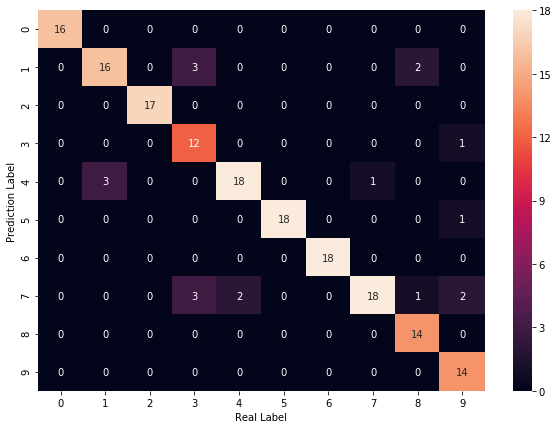

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:25 index:[5] real:5
#1 min_error:29 index:[2] real:2
#2 min_error:34 index:[8] real:8
#3 min_error:11 index:[0] real:0
#4 min_error:17 index:[1] real:1
#5 min_error:12 index:[7] real:7
#6 min_error:10 index:[6] real:6
#7 min_error:17 index:[3] real:3
#8 min_error:15 index:[2] real:2
#9 min_error:18 index:[1] real:1
#10 min_error:34 index:[7] real:7
#11 min_error:26 index:[7] real:4
#12 min_error:16 index:[6] real:6
#13 min_error:18 index:[3] real:3
#14 min_error:17 index:[1] real:1
#15 min_error:23 index:[3] real:3
#16 min_error:30 index:[7] real:9
#17 min_error:21 index:[1] real:1
#18 min_error:27 index:[7] real:7
#19 min_error:8 index:[6] real:6
#20 min_error:29 index:[8] real:8
#21 min_error:11 index:[4] real:4
#22 min_error:17 index:[3] real:3
#23 min_error:20 index:[1] real:1
#24 min_error:11 index:[4] real:4
#25 min_error:12 index:[0] real:0
#26 min_error:15 index:[5] real:5
#27 min_error:15 index:[3] real:3
#28 min_error:28 index:[6] real:6
#29 min_error:29 index:[9

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9022881880024737
Avg Base Learner:0.8135930735930736


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

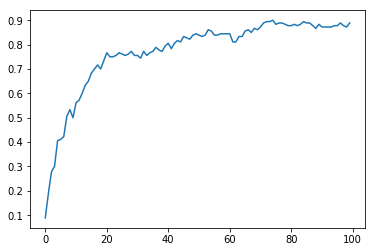

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:2125 Total connections::2593
